In [1]:
import pandas as pd
import numpy as np
import operator, statistics
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from msda.msda import *
from msda.anamoly import *
%matplotlib inline

# Import time-series data

In [2]:
df = pd.read_excel('m_1.xlsx')
df.shape

(46368, 9)

In [3]:
df.columns

Index(['timestamp', 'machine_id', 'cpu_util_percent', 'mem_util_percent',
       'mem_gps', 'mkpi', 'net_in', 'net_out', 'disk_io_percent'],
      dtype='object')

In [4]:
df.head()

,timestamp,machine_id,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,2011-05-01 12:00:10,m_1,13,84,NaN,NaN,32.46,23.09,1
1,2011-05-01 12:00:20,m_1,10,84,NaN,NaN,32.46,23.09,1
2,2011-05-01 12:00:30,m_1,11,84,NaN,NaN,32.46,23.09,1
3,2011-05-01 12:00:40,m_1,12,84,NaN,NaN,32.46,23.09,1
4,2011-05-01 12:00:50,m_1,12,84,NaN,NaN,32.46,23.09,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46368 entries, 0 to 46367
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         46368 non-null  datetime64[ns]
 1   machine_id        46368 non-null  object        
 2   cpu_util_percent  46368 non-null  int64         
 3   mem_util_percent  46368 non-null  int64         
 4   mem_gps           0 non-null      float64       
 5   mkpi              0 non-null      float64       
 6   net_in            46368 non-null  float64       
 7   net_out           46368 non-null  float64       
 8   disk_io_percent   46368 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.2+ MB


# Check missing values with missing function

In [6]:
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row timestamp               0
machine_id              0
cpu_util_percent        0
mem_util_percent        0
mem_gps             46368
mkpi                46368
net_in                  0
net_out                 0
disk_io_percent         0
dtype: int64
Missing by col 0        2
1        2
2        2
3        2
4        2
        ..
46363    2
46364    2
46365    2
46366    2
46367    2
Length: 46368, dtype: int64


# Impute missing values with impute function (modes=0,1, 2, else backfill)
### 0: impute with zero, 1: impute with mean, 2: impute with median, else impute with backfill method

In [7]:
df_no_na = ExploratoryDataAnalysis.impute(df=df, modes=0)

In [8]:
df_no_na.head()

,timestamp,machine_id,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,2011-05-01 12:00:10,m_1,13,84,0.0,0.0,32.46,23.09,1
1,2011-05-01 12:00:20,m_1,10,84,0.0,0.0,32.46,23.09,1
2,2011-05-01 12:00:30,m_1,11,84,0.0,0.0,32.46,23.09,1
3,2011-05-01 12:00:40,m_1,12,84,0.0,0.0,32.46,23.09,1
4,2011-05-01 12:00:50,m_1,12,84,0.0,0.0,32.46,23.09,1


In [9]:
print("Missing information for whole dataset")
print("Missing by row", df_no_na.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df_no_na.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row timestamp           0
machine_id          0
cpu_util_percent    0
mem_util_percent    0
mem_gps             0
mkpi                0
net_in              0
net_out             0
disk_io_percent     0
dtype: int64
Missing by col 0        0
1        0
2        0
3        0
4        0
        ..
46363    0
46364    0
46365    0
46366    0
46367    0
Length: 46368, dtype: int64


# Input data to ANOMALY DETECTOR
### we are inputing data with no missing values, removal of unsignificant fields, assert timestamp field, etc.

In [10]:
anamoly_data, anamoly_df = Anamoly.read_data(data=df_no_na, column_index_to_drop=1, timestamp_column_index=0)

In [11]:
anamoly_data, anamoly_df = Anamoly.read_data(data=df_no_na, column_index_to_drop=0, timestamp_column_index=0)

In [12]:
anamoly_data.columns

Index(['cpu_util_percent', 'mem_util_percent', 'mem_gps', 'mkpi', 'net_in',
       'net_out', 'disk_io_percent'],
      dtype='object')

In [13]:
anamoly_df.columns

Index(['cpu_util_percent', 'mem_util_percent', 'mem_gps', 'mkpi', 'net_in',
       'net_out', 'disk_io_percent'],
      dtype='object')

In [14]:
anamoly_df.head()

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
timestamp,,,,,,,
2011-05-01 12:00:10,13,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:20,10,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:30,11,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:40,12,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:50,12,84,0.0,0.0,32.46,23.09,1


In [15]:
anamoly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46368 entries, 2011-05-01 12:00:10 to 2011-05-07 16:38:10
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_util_percent  46368 non-null  int64  
 1   mem_util_percent  46368 non-null  int64  
 2   mem_gps           46368 non-null  float64
 3   mkpi              46368 non-null  float64
 4   net_in            46368 non-null  float64
 5   net_out           46368 non-null  float64
 6   disk_io_percent   46368 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 2.8 MB


# Data Preprocessing with user-input time window size

In [16]:
X,Y,timesteps,X_data = Anamoly.data_pre_processing(df=anamoly_df, LOOKBACK_SIZE=10)

# Selecting the deep models, time window size, kernel size
### Available models - Deep Convolutional Neural Network, LSTM AUTOENCODERS
### Possible Values ['deepcnn', 'lstmaenn']

In [17]:
MODEL_SELECTED, LOOKBACK_SIZE, KERNEL_SIZE = Anamoly.set_config(MODEL_SELECTED='deepcnn', LOOKBACK_SIZE=10, KERNEL_SIZE=2)

MODEL_SELECTED = deepcnn
LOOKBACK_SIZE = 10
KERNEL_SIZE = 2


# Training the selected ANOMALY detector model
### It will use GPU if available other CPU
### DeepCNN example

In [18]:
loss, train_data, model = Anamoly.compute(X, Y, LOOKBACK_SIZE=10, num_of_numerical_features=7, MODEL_SELECTED=MODEL_SELECTED, KERNEL_SIZE=KERNEL_SIZE, epocs=30)

cpu
DeepCNN(
  (conv1d_1_layer): Conv1d(10, 16, kernel_size=(2,), stride=(1,))
  (relu_1_layer): ReLU()
  (maxpooling_1_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv1d_2_layer): Conv1d(16, 16, kernel_size=(2,), stride=(1,))
  (relu_2_layer): ReLU()
  (maxpooling_2_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (dense_1_layer): Linear(in_features=80, out_features=40, bias=True)
  (relu_3_layer): ReLU()
  (dropout_layer): Dropout(p=0.25, inplace=False)
  (dense_2_layer): Linear(in_features=40, out_features=7, bias=True)
)
Training Loss: 0.06785754502986817 - Epoch: 1
Training Loss: 0.024009390804194185 - Epoch: 2
Training Loss: 0.021210704883849768 - Epoch: 3
Training Loss: 0.019161246059458573 - Epoch: 4
Training Loss: 0.017295648584886615 - Epoch: 5
Training Loss: 0.015809928586679525 - Epoch: 6
Training Loss: 0.014475884341671446 - Epoch: 7
Training Lo

# Finding Anomalies
### DeepCNN example

In [19]:
loss_df = Anamoly.find_anamoly(loss=loss, T=timesteps)

# Plotting Samples with confidence score
### DeepCNN example

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


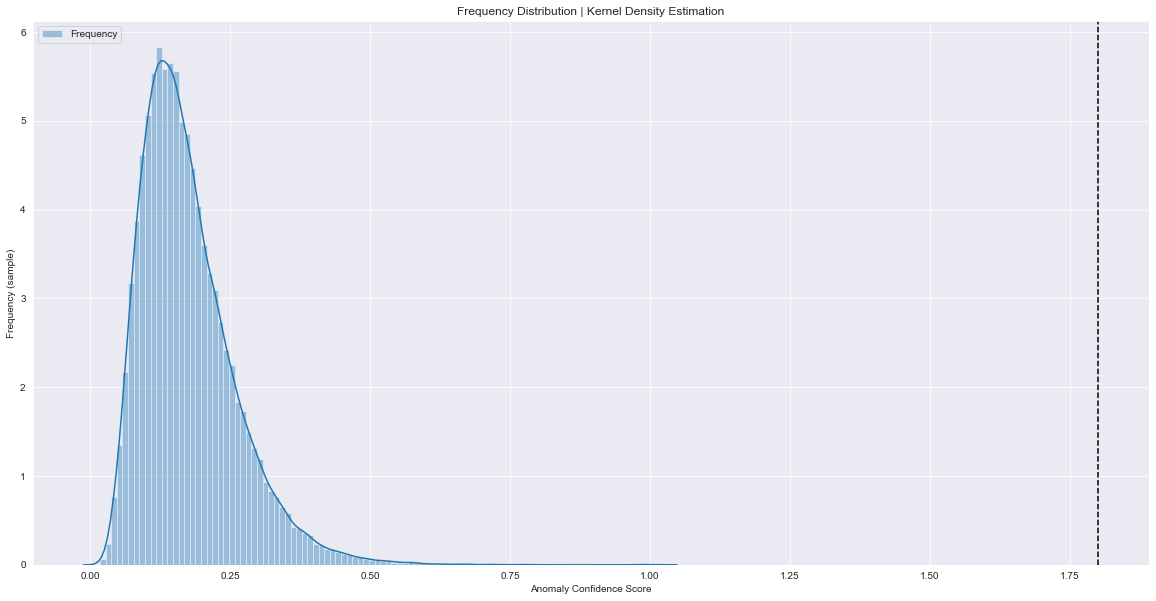

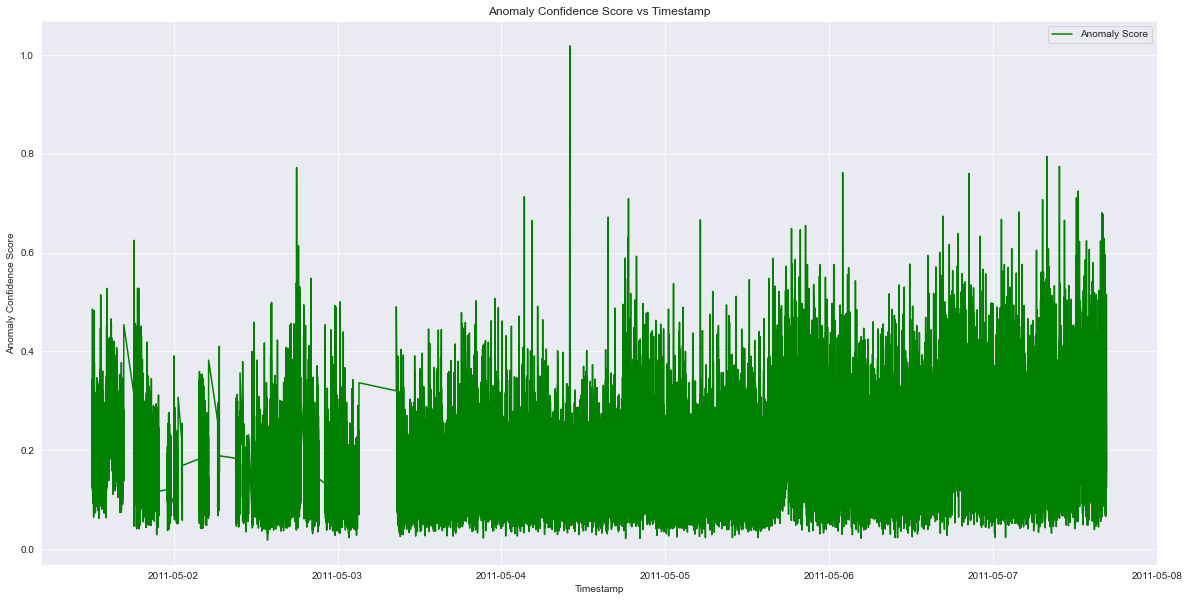

In [20]:
Anamoly.plot_anamoly_results(loss_df=loss_df)

# Intepretable results of predictions from the anomaly detector - DeepCNN
### Input: Prediction Results for which row (specific_prediction_sample_to_explain), Window Difference (input_label_index_value)
### Possible Modes: Individual Instance Explainable Results, Batch of data Explainable Results

Epoch 1/30
1449/1449 [==============================] - 23s 4ms/step - loss: 1.8009
Epoch 2/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0940
Epoch 3/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0859
Epoch 4/30
1449/1449 [==============================] - 4s 3ms/step - loss: 0.0764
Epoch 5/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0743
Epoch 6/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0666
Epoch 7/30
1449/1449 [==============================] - 4s 3ms/step - loss: 0.0649
Epoch 8/30
1449/1449 [==============================] - 6s 4ms/step - loss: 0.0614
Epoch 9/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0575
Epoch 10/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0535
Epoch 11/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0544
Epoch 12/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0534


  0%|          | 0/50 [00:00<?, ?it/s]

Current Label Shown: window_diff_1



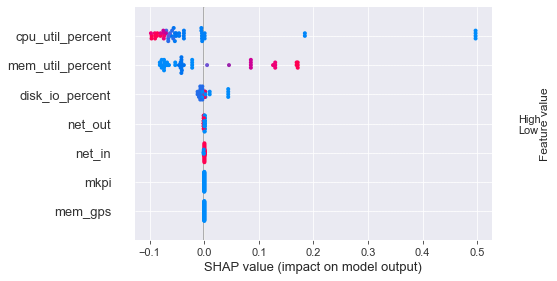

Current Label Shown: window_diff_1



In [22]:
Anamoly.explainable_results(X=anamoly_data, Y=Y, specific_prediction_sample_to_explain=10,input_label_index_value=1, num_labels=7)

# Selecting the deep models, time window size, kernel size
### Available models - Deep Convolutional Neural Network, LSTM AUTOENCODERS
### Possible Values ['deepcnn', 'lstmaenn']

In [23]:
MODEL_SELECTED, LOOKBACK_SIZE, KERNEL_SIZE = Anamoly.set_config(MODEL_SELECTED='lstmaenn', LOOKBACK_SIZE=10, KERNEL_SIZE=2)

MODEL_SELECTED = lstmaenn
LOOKBACK_SIZE = 10
KERNEL_SIZE = 2


# Training the selected ANOMALY detector model
### It will use GPU if available other CPU
### LSTMAENN example

In [24]:
loss, train_data, model = Anamoly.compute(X, Y, LOOKBACK_SIZE=10, num_of_numerical_features=7, MODEL_SELECTED=MODEL_SELECTED, KERNEL_SIZE=KERNEL_SIZE, epocs=30)

cpu
LSTMAENN(
  (lstm_1_layer): LSTM(7, 128)
  (dropout_1_layer): Dropout(p=0.2, inplace=False)
  (lstm_2_layer): LSTM(128, 64)
  (dropout_2_layer): Dropout(p=0.2, inplace=False)
  (lstm_3_layer): LSTM(64, 64)
  (dropout_3_layer): Dropout(p=0.2, inplace=False)
  (lstm_4_layer): LSTM(64, 128)
  (dropout_4_layer): Dropout(p=0.2, inplace=False)
  (linear_layer): Linear(in_features=128, out_features=7, bias=True)
)
Training Loss: 0.0435767826766259 - Epoch: 1
Training Loss: 0.029408056078140614 - Epoch: 2
Training Loss: 0.02673500294657649 - Epoch: 3
Training Loss: 0.024658333284881935 - Epoch: 4
Training Loss: 0.022137400399497596 - Epoch: 5
Training Loss: 0.01879816349506445 - Epoch: 6
Training Loss: 0.016021097393538044 - Epoch: 7
Training Loss: 0.013826053095801512 - Epoch: 8
Training Loss: 0.012344365267036772 - Epoch: 9
Training Loss: 0.011332353011893302 - Epoch: 10
Training Loss: 0.010571254392072887 - Epoch: 11
Training Loss: 0.009912241768642098 - Epoch: 12
Training Loss: 0.00934

# Finding Anomalies
### LSTMAENN example

In [25]:
loss_df = Anamoly.find_anamoly(loss=loss, T=timesteps)

# Plotting Samples with confidence score
### LSTMAENN example

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


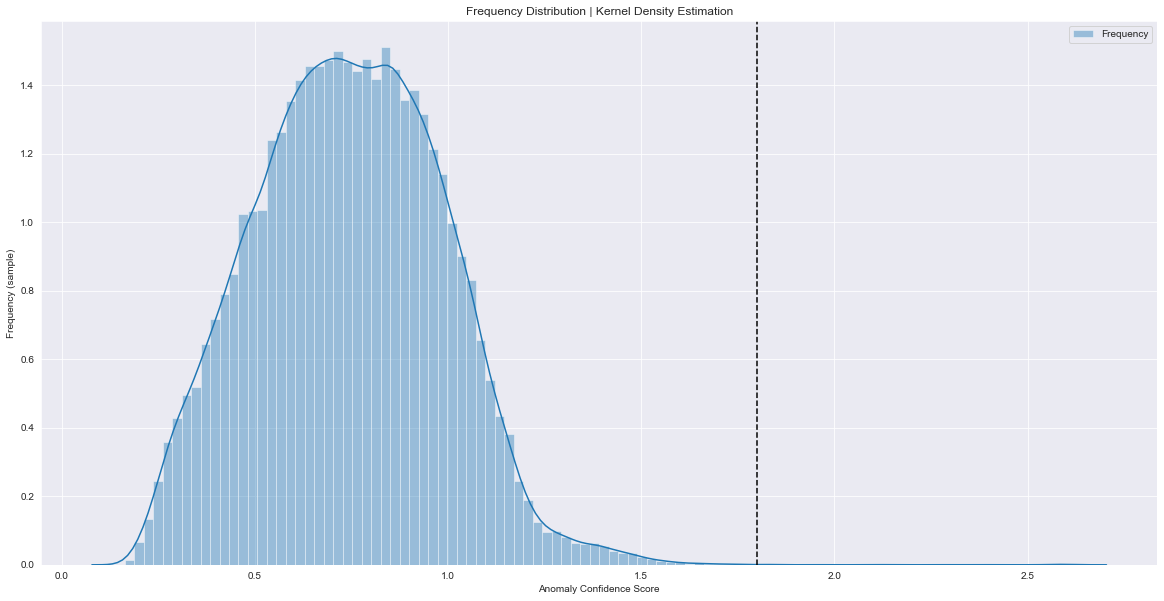

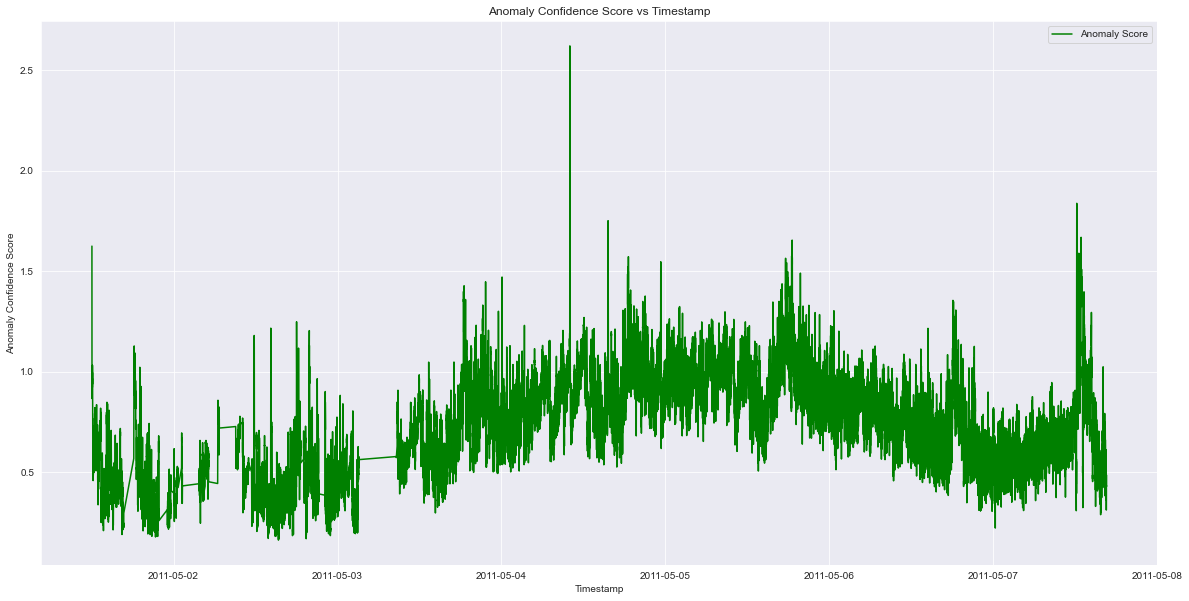

In [26]:
Anamoly.plot_anamoly_results(loss_df=loss_df)

# Intepretable results of predictions from the anomaly detector - LSTMAENN
### Input: Prediction Results for which row (specific_prediction_sample_to_explain), Window Difference (input_label_index_value)
### Possible Modes: Individual Instance Explainable Results, Batch of data Explainable Results

Epoch 1/30
1449/1449 [==============================] - 6s 3ms/step - loss: 4.4260
Epoch 2/30
1449/1449 [==============================] - 4s 3ms/step - loss: 0.0964
Epoch 3/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0871
Epoch 4/30
1449/1449 [==============================] - 4s 3ms/step - loss: 0.0812
Epoch 5/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0764
Epoch 6/30
1449/1449 [==============================] - 4s 3ms/step - loss: 0.0742
Epoch 7/30
1449/1449 [==============================] - 4s 3ms/step - loss: 0.0709
Epoch 8/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0668
Epoch 9/30
1449/1449 [==============================] - 4s 3ms/step - loss: 0.0673
Epoch 10/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0654
Epoch 11/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0617
Epoch 12/30
1449/1449 [==============================] - 5s 3ms/step - loss: 0.0625
E

  0%|          | 0/50 [00:00<?, ?it/s]

Current Label Shown: window_diff_0



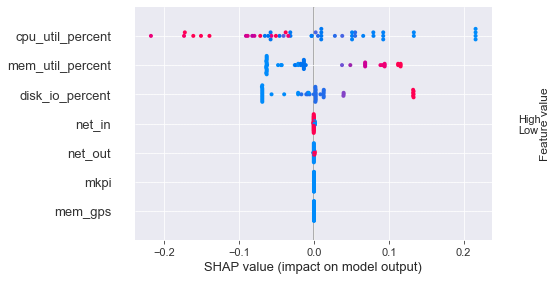

Current Label Shown: window_diff_0



In [27]:
Anamoly.explainable_results(X=anamoly_data, Y=Y, specific_prediction_sample_to_explain=5,input_label_index_value=0, num_labels=7)